In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


In [2]:
from google.colab import files
uploaded = files.upload()

Saving pre_processed_data_1.csv to pre_processed_data_1 (5).csv


In [3]:
customer_data_df = pd.read_csv("pre_processed_data_1.csv", sep = "\t")
customer_data_df

,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,Days_Customer,Related,Single,Unrelated,Post-Graduate,Under-Graduate
0,58138.0,1,0,1617,0,25,65,3668,0.0,1.0,0.0,1.0,0.0
1,46344.0,0,2,27,0,6,68,2822,0.0,1.0,0.0,1.0,0.0
2,71613.0,0,0,776,0,21,57,3169,1.0,0.0,0.0,1.0,0.0
3,26646.0,0,1,53,0,8,38,2762,1.0,0.0,0.0,1.0,0.0
4,58293.0,0,1,422,0,19,41,3018,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,1341,0,18,55,3238,1.0,0.0,0.0,1.0,0.0
2236,64014.0,0,3,444,1,22,76,2758,1.0,0.0,0.0,1.0,0.0
2237,56981.0,0,0,1241,1,19,41,3012,0.0,1.0,0.0,1.0,0.0
2238,69245.0,0,1,843,0,23,66,3013,1.0,0.0,0.0,1.0,0.0


In [4]:
X = customer_data_df.drop('Response', axis = 1)
y = customer_data_df['Response']

In [5]:
xdev, xtest, ydev, ytest = train_test_split(X, y, stratify = y, test_size=0.2)

In [6]:
ss = StandardScaler()
xdev = ss.fit_transform(xdev)
xtest = ss.transform(xtest)

In [8]:
ytest_original = ytest
ydev = to_categorical(ydev, 2)
ytest = to_categorical(ytest, 2)

In [9]:
print(xdev.shape)
print(ydev.shape)

(1792, 12)
(1792, 2)


In [10]:
def create_model(optimizer):
  model = Sequential([
      layers.Dense(128, input_shape=(12,)),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(64),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(32),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(2, activation = 'sigmoid')
  ])
  optimizer = optimizer
  model.compile(optimizer= optimizer,
                loss="binary_crossentropy",
                metrics=['accuracy'])
  return model

clf = KerasClassifier(create_model, epochs=20)
param_grid = {'batch_size':[32, 64, 128], 
              'optimizer':['adam', 'SGD']}
grid = GridSearchCV(clf, param_grid = param_grid, cv = 3)
history = grid.fit(xdev, ydev)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/20
38/38 [==============================] - 1s 3ms/step - loss: 0.6601 - accuracy: 0.7002
Epoch 2/20
38/38 [==============================] - 0s 4ms/step - loss: 0.4683 - accuracy: 0.8434
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3959 - accuracy: 0.8626
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3553 - accuracy: 0.8727
Epoch 5/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3336 - accuracy: 0.8710
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8769
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8811
Epoch 8/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3012 - accuracy: 0.8794
Epoch 9/20
38/38 [==============================] - 0s 4ms/step - loss: 0.3048 - accuracy: 0.8786
Epoch 10/20
38/38 [==============================] - 0s 3ms/step - loss: 0.3039 - accuracy: 0.8727
Epoch 11/20
38/38 [

In [11]:
best_index = history.cv_results_['rank_test_score'][0]
history.cv_results_['params'][best_index-1]

{'batch_size': 128, 'optimizer': 'SGD'}

In [12]:
model = Sequential([
    layers.Dense(128, input_shape=(12,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(2, activation = 'sigmoid')
])
optimizer = 'SGD'
model.compile(optimizer= optimizer,
              loss="binary_crossentropy",
              metrics=['categorical_accuracy'])
history = model.fit(
  xdev,
  ydev,
  epochs=30,
  batch_size = 128,
  validation_split=0.2
)

Epoch 1/30
12/12 [==============================] - 2s 56ms/step - loss: 0.6653 - categorical_accuracy: 0.7104 - val_loss: 0.6569 - val_categorical_accuracy: 0.8496
Epoch 2/30
12/12 [==============================] - 0s 5ms/step - loss: 0.6200 - categorical_accuracy: 0.7795 - val_loss: 0.6436 - val_categorical_accuracy: 0.8691
Epoch 3/30
12/12 [==============================] - 0s 6ms/step - loss: 0.5861 - categorical_accuracy: 0.8151 - val_loss: 0.6282 - val_categorical_accuracy: 0.8719
Epoch 4/30
12/12 [==============================] - 0s 7ms/step - loss: 0.5548 - categorical_accuracy: 0.8402 - val_loss: 0.6110 - val_categorical_accuracy: 0.8747
Epoch 5/30
12/12 [==============================] - 0s 5ms/step - loss: 0.5280 - categorical_accuracy: 0.8472 - val_loss: 0.5939 - val_categorical_accuracy: 0.8774
Epoch 6/30
12/12 [==============================] - 0s 7ms/step - loss: 0.5114 - categorical_accuracy: 0.8542 - val_loss: 0.5769 - val_categorical_accuracy: 0.8774
Epoch 7/30
12/1

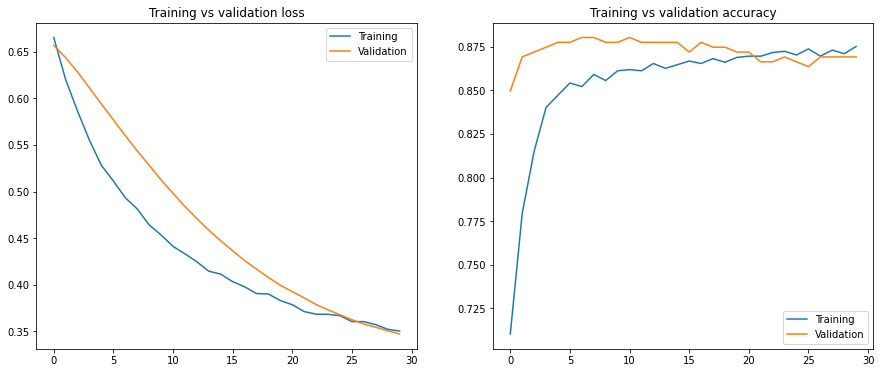

In [13]:
def plotAccLoss(history, epoch):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']

  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.plot(range(epoch), loss, label='Training')
  plt.plot(range(epoch), val_loss, label='Validation')
  plt.legend()
  plt.title('Training vs validation loss')

  plt.subplot(1, 2, 2)
  plt.plot(range(epoch), acc, label='Training')
  plt.plot(range(epoch), val_acc, label='Validation')
  plt.legend()
  plt.title('Training vs validation accuracy')
  plt.show()

plotAccLoss(history, epoch = 30)

In [14]:
metrics = model.evaluate(xtest, ytest)

14/14 [==============================] - 0s 2ms/step - loss: 0.3634 - categorical_accuracy: 0.8705


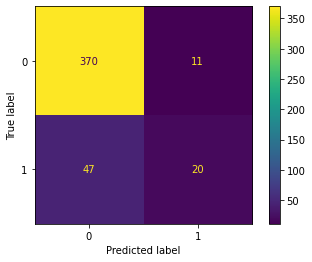

In [15]:
ytest_prob = model.predict(xtest)
ytest_pred = np.array([x[-1] for x in np.argsort(ytest_prob, axis=1)])
mcm = confusion_matrix(ytest_original, ytest_pred)
disp = ConfusionMatrixDisplay(mcm)
disp.plot()

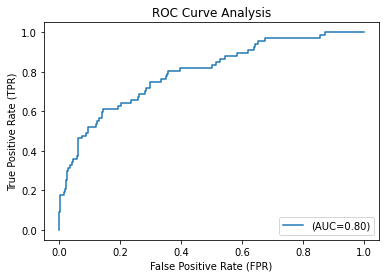

In [16]:
fpr, tpr, thresholds = roc_curve(ytest_original, ytest_prob[:,-1], pos_label = 1)
auc = roc_auc_score(ytest_original, ytest_prob[:,-1])
plt.plot(fpr, tpr, label = "(AUC={:.2f})".format(auc))

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Analysis")
plt.legend(loc = "lower right")
plt.show()

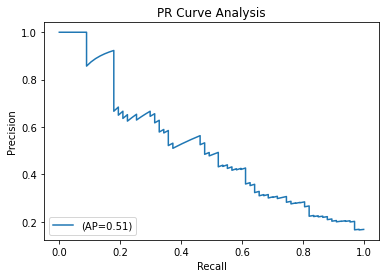

In [17]:
precision, recall, thresholds = precision_recall_curve(ytest_original, ytest_prob[:,-1], pos_label = 1)
ap = average_precision_score(ytest_original, ytest_prob[:,-1],)
plt.plot(recall, precision, label = "(AP={:.2f})".format(ap))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve Analysis")
plt.legend(loc = "lower left")
plt.show()

Deploy SMOTE on development set.

In [18]:
X = customer_data_df.drop('Response', axis = 1)
y = customer_data_df['Response']

xdev, xtest, ydev, ytest = train_test_split(X, y, stratify = y, test_size=0.2)

ss = StandardScaler()
xdev = ss.fit_transform(xdev)
xtest = ss.transform(xtest)

smote = SMOTE(random_state = 42)
xdev, ydev = smote.fit_resample(xdev, ydev)

ytest_original = ytest
ydev = to_categorical(ydev, 2)
ytest = to_categorical(ytest, 2)

In [19]:
print(xdev.shape)
print(ydev.shape)

(3050, 12)
(3050, 2)


In [32]:
model = Sequential([
    layers.Dense(128, input_shape=(12,)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(32),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(2, activation = 'sigmoid')
])
optimizer = 'SGD'
model.compile(optimizer= optimizer,
              loss="binary_crossentropy",
              metrics=['categorical_accuracy'])
history = model.fit(
  xdev,
  ydev,
  epochs=50,
  batch_size = 128,
  validation_split=0.2
)

Epoch 1/50
20/20 [==============================] - 3s 24ms/step - loss: 0.7380 - categorical_accuracy: 0.5689 - val_loss: 0.7492 - val_categorical_accuracy: 0.0967
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6367 - categorical_accuracy: 0.6873 - val_loss: 0.7085 - val_categorical_accuracy: 0.3098
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.5822 - categorical_accuracy: 0.7295 - val_loss: 0.6978 - val_categorical_accuracy: 0.3590
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5527 - categorical_accuracy: 0.7463 - val_loss: 0.6949 - val_categorical_accuracy: 0.4033
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5362 - categorical_accuracy: 0.7520 - val_loss: 0.6966 - val_categorical_accuracy: 0.4197
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5209 - categorical_accuracy: 0.7598 - val_loss: 0.6938 - val_categorical_accuracy: 0.4443
Epoch 7/50
20/2

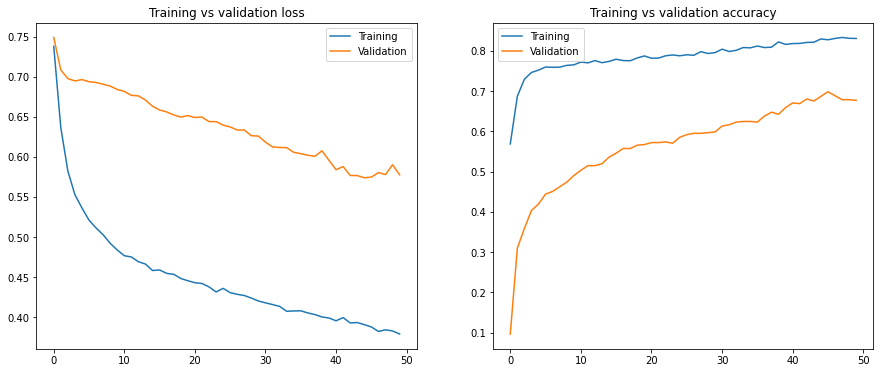

In [33]:
plotAccLoss(history, epoch = 50)

In [34]:
metrics = model.evaluate(xtest, ytest)

14/14 [==============================] - 0s 2ms/step - loss: 0.4186 - categorical_accuracy: 0.8281


The result becomes worse after using SMOTE.